# Test de entramiento 

### En este notebook encontraremos Una serie de entrenamientos y validaciones de nuestro modelo para concluir con el mejor posible, utilizaremos primero todas las variables ya que si bien conseguimos algunas variables que más se correlacionan con el G3 al no conocer bien los datos y el modelo exacto del nogico en este caso los colegios no sabemos si pueden haber o no variables que sean influyentes al modelo

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV #Esta parte nos sirve para la separación de nuestros datos para que el modelo no memorice y por si necesitamos encotnrar algun hyperparametro
from sklearn.preprocessing import StandardScaler #Estandarizar nuestros valores con mean = 0 , std = 1 para no confusiones del modelo
from sklearn.linear_model import LinearRegression #Modelo de regresion lineal 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #Métricas para evaluar nuestro modelo

df = pd.read_csv('../data/student-por.csv', sep=';') #Cargamos los datos 
df.head(5) #Revisamos 5 primeros datos

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [44]:
#Creamos una copia del dataframe para convertir las variables categoricas a numeros para poder usarlos en el entrenamiento
df_copy = df.copy()

#Convertimos variables categoricas a numericas
df_copy = pd.get_dummies(df_copy, dtype=int, drop_first=True)

In [45]:
#Separamos las variables a utilizar (Entrenamiento) (Predicción)
X = df_copy.drop('G3', axis=1) #Seleccionamos todas las variables menos G3
y = df_copy['G3'] #Seleccionamos G3 la cual es la variable que queremos predecir 

In [46]:
#Realizamos la separacion de nuestros datos  20% test y 80% Entrenamiento 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#Ahora tenemos que escalar nuestros datos para que el modelo no se confunda 
#Variables a escalar debido que las variables categroicas ya están normalizadas
vars = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']

#Instanciamos nuestro escaler:  Formula z = (x - promedio) / std(Desviación estandar)
escalerx = StandardScaler()#Para X

#Para X
X_train[vars] = escalerx.fit_transform(X_train[vars]) #Aprende cuales datos y los escala
X_test[vars] = escalerx.transform(X_test[vars]) #Al aprender de los datos solo necesitamos transformar 

#Para Y , al no tener valores muy grandes la escala relamente no afecta en la decisión del modelo , mientras que si escalamos prediciría valores en los rangos de la escala no es lo valores reales 

### Revisamos nuestra separación 

In [47]:
print(X_train.shape)
X_train.head(2)

(519, 41)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
332,0.987932,-0.437418,-0.256337,-0.75431,1.352962,-0.382133,0.068136,-0.18668,-0.196270,-0.539674,...,1,0,0,1,0,0,1,1,1,0
29,-0.629534,1.350140,1.591423,-0.75431,0.121054,-0.382133,0.068136,0.75397,1.501468,3.579309,...,1,0,0,1,1,1,1,1,1,1


In [48]:
print(X_test.shape)
X_test.head(2)

(130, 41)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
636,0.987932,1.350140,1.591423,-0.75431,0.121054,-0.382133,-0.971942,-1.12733,0.652599,-0.539674,...,0,0,0,0,0,1,0,1,1,0
220,-0.629534,0.456361,-1.180216,-0.75431,0.121054,-0.382133,-2.012020,-0.18668,-0.196270,0.490072,...,1,0,0,1,0,0,1,1,1,0


In [49]:
#Realizamos entrenamiento para ver como está el modelo y como podemos mejorar
#Instanciamos el modelo de regresión lineal 
model = LinearRegression()
model.fit(X_train, Y_train) #Nos encargamos de realizar el entrenamiento el cual va estar buscando una linea que se ajuste lo mas cerca a los datos (En el blog de mi portafolio tengo un específicio de regresión lineal)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_predict = model.predict(X_test) #Le pasamos nuevos datos para que pueda aplicar lo aprendido 

#Evaluación 
print(f'MSE (Mean Squared Error - - Función de costo) {mean_squared_error(Y_test, y_predict)}') #Promedio de la distancia de diferencia entre lo real y lo predicho en unidades al cuadrado
print(f'MAE (Mean Absolute Error - - Función de costo con valores absolutos) {mean_absolute_error(Y_test, y_predict)}') #Promedio de la distancia de lo predicho a lo real pero en las unidades de los datos
print(f'R2 (Coeficiente de determinacón - - (∑(y - yp)^2 / ∑(y - promedioY)^2 ) {r2_score(Y_test, y_predict)}') #Revisar que tan bien calcula la varianza nuestro modelo, ya que por ejemplo  si todos los estudiantes tuvieran la misma nota el modelo no aprendería bien entonces necesitamos variación en los datos 
r2_before = r2_score(Y_test, y_predict) #Variable para comparar r2

MSE (Mean Squared Error - - Función de costo) 1.4759092563639302
MAE (Mean Absolute Error - - Función de costo con valores absolutos) 0.7650597682758259
R2 (Coeficiente de determinacón - - (∑(y - yp)^2 / ∑(y - promedioY)^2 ) 0.8486513286537316


In [51]:
#Revismos cual de los features ayuda más a ajustar nuestro modelo
coef = model.coef_
intercept = model.intercept_

print(f"Intercept {intercept} \n Coeficientes {coef}")
print(f"Names \n {model.feature_names_in_}")

Intercept 12.142247664133233 
 Coeficientes [ 0.00737172 -0.16625415  0.04154028  0.08366242  0.05008163 -0.1243028
 -0.04014047 -0.11390829  0.02084217 -0.06785075  0.03515618 -0.07944214
  0.05397063  0.46026166  2.47173541 -0.30455148 -0.08359911  0.10478066
  0.07862527 -0.0235799   0.34300007 -0.12582091  0.25992253  0.30268193
 -0.30857047 -0.33055305 -0.53062993 -0.53576938 -0.12367499 -0.41871
 -0.14401519 -0.00869322  0.32254835 -0.15765791  0.12045871 -0.19235757
 -0.0394722  -0.06090104  0.05089595  0.11286848  0.06072236]
Names 
 ['age' 'Medu' 'Fedu' 'traveltime' 'studytime' 'failures' 'famrel'
 'freetime' 'goout' 'Dalc' 'Walc' 'health' 'absences' 'G1' 'G2'
 'school_MS' 'sex_M' 'address_U' 'famsize_LE3' 'Pstatus_T' 'Mjob_health'
 'Mjob_other' 'Mjob_services' 'Mjob_teacher' 'Fjob_health' 'Fjob_other'
 'Fjob_services' 'Fjob_teacher' 'reason_home' 'reason_other'
 'reason_reputation' 'guardian_mother' 'guardian_other' 'schoolsup_yes'
 'famsup_yes' 'paid_yes' 'activities_yes' 'n

### El modelo captura bien la variabilidad de los datos, se está equivocando casi por 1 punto de diferencia en la nota de G3 en promedio , lo cual quiere decir que nuestro modelo está bien pero lo podemos mejorar , aún podemos aplicar reducción de variables que hace que el modelo funcione mejor , para esto nos ayudaremos de algunos modelos de seleccion de características a ver si algunas comparten las mismas en común para utilizarlas 

In [52]:
#Para este paso utilizaremos un arbol de decisión y selector de mejores métricas individuales respecto a Y 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.feature_selection import SelectKBest, f_regression

#Emepzaremos con el SelecKBest
selector = SelectKBest(score_func=f_regression)

#Buscamos las mejores k para el modelo
parameters = {
    'k': [5, 10, 15, 'all']
}

grid = GridSearchCV(estimator=selector, param_grid=parameters, cv=5 , scoring='r2')
grid.fit(X_train, Y_train)

print(f"Mejor numero de variables {grid.best_params_}")

Mejor numero de variables {'k': 5}


/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 399, in _score
    response_method = _check_response_method(estimator, self._response_method)
  File "/home/j/Machine-Learning-Solutions/venv/lib/python3.10/site-packages/sklearn/utils/validation.py", line 22

In [53]:
#Creamos el modelo con las  mejores caracteristicas fue con k = 5 , así que utilizaremos esas carecterísticas para seleccionar 
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_train, Y_train)

#Extraemos los resultados y los features para poder visualizarlo y compararlo 
scores = selector.scores_
features = X.columns

#Creación del dataframe con resultados
resultados_sk = pd.DataFrame({'features': features, 'scores':scores}).sort_values(by='scores',ascending=False)

In [54]:
#Creamos el modelo de arbol de decisión pra revisar las que mas influyen 
arbol = DecisionTreeRegressor(random_state=42)
arbol.fit(X, y)

#Obtener las variables mas imporatnes para el modelo
importances = arbol.feature_importances_

#Creamos el dataframe de resultados
resultados_dt = pd.DataFrame({'features': features, 'importances': importances}).sort_values(by='importances', ascending=False)

/tmp/ipykernel_2536/592911440.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_sk, x='scores', y='features', palette='Set1', ax=axs[0])
/tmp/ipykernel_2536/592911440.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_dt, x='importances', y='features', palette='Set2', ax=axs[1])


Text(0.5, 1.0, 'Mejores características para Decisiontree')

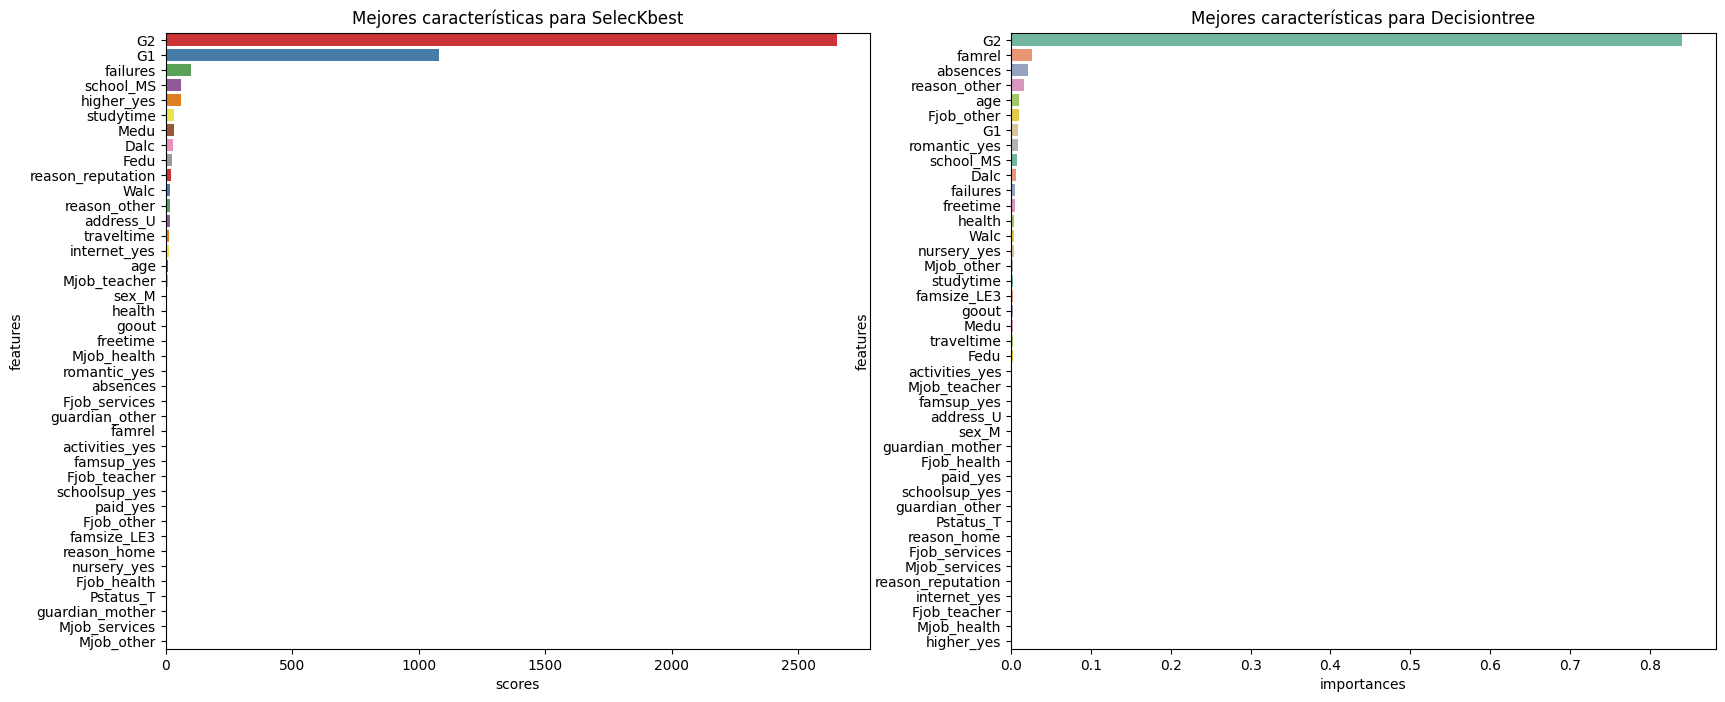

In [55]:
#Lirerías para graficar
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20, 8)) #Ajustamos un tamañano y las figuras a usar
#Graficamos para SelecKbest
sns.barplot(data=resultados_sk, x='scores', y='features', palette='Set1', ax=axs[0])
axs[0].set_title("Mejores características para SelecKbest")

sns.barplot(data=resultados_dt, x='importances', y='features', palette='Set2', ax=axs[1])
axs[1].set_title("Mejores características para Decisiontree")

### Utilizaremos G2, G1, y Failures como decisón final , parecido a la consluión anterior respecto a las correlaciones, pero con este paso nos aseguramos más

### Reentrenamiento con nuevas variables

In [56]:
#Variables a utilizar nuevas
X = df_copy[['G2', 'G1', 'failures']]
y = df_copy['G3']

In [57]:
#Separación
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=0.2)
#Estandarización
escalerx = StandardScaler()
X_train = escalerx.fit_transform(X_train)
X_test = escalerx.transform(X_test)
#Entrenamos el modelo
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
#volvemos a revisar el modelo
y_predict = model.predict(X_test)
print(f'MSE (Mean Squared Error - - Función de costo) {mean_squared_error(Y_test, y_predict)}')
print(f'MAE (Mean Absolute Error - - Función de costo con valores absolutos) {mean_absolute_error(Y_test, y_predict)}')
print(f'R2 (Coeficiente de determinacón - - (∑(y - yp)^2 / ∑(y - promedioY)^2 ) {r2_score(Y_test, y_predict)}')
r2_after = r2_score(Y_test, y_predict)
if r2_after > r2_before:
    print(f"Modelo mejoró por un {r2_after - r2_before}")

MSE (Mean Squared Error - - Función de costo) 1.3300088229762677
MAE (Mean Absolute Error - - Función de costo con valores absolutos) 0.7302900511711866
R2 (Coeficiente de determinacón - - (∑(y - yp)^2 / ∑(y - promedioY)^2 ) 0.8636128424777376
Modelo mejoró por un 0.014961513824006012


### En este notbook hicimos el entrnamiento de nuestro modelo, con todas las variables para no descartar ninguna antes de verificar bien , también implementamos otros dos modelos para poder revisar features mas imporatntes para esos modelos y comparando con la correlación , valido para utilizar n features especificos , tambíen implementamos busqueda de un hyperparametro necesario para la busqueda de mejor feature, Pudimos evidenciar como nuestro primer modelo, si bien nos da unos buenos resultados, pudimos mejorarlo con la selección de features y revisando algunos coeficientes que ayudaban mejor a ajustar nuestro modelo, con esto concluimos que el modelo se comporta mejor con los features (G2,G1,failures) Que serían las notas de G1 y G2 y la cantidad de materias reprobadas anteriormente, con esto estamos listos para integrarlo a un pipline y generar un poco de interactividad para predecir el G3